<a href="https://colab.research.google.com/github/LucasSilvaFerreira/IGVF_CRISPR_PIPELINES/blob/main/Perturb_Seq/Analysis/Pipelines/Pinello_lab/Simulation_sceptre_shendure_Data_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installs

In [ ]:
#execute the first time running the session 
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:

!pip  install anndata

In [ ]:
!pip3 install --upgrade synapseclient # download synapse client

In [2]:
login, passw = open('/content/cred').read().split('\n') # using my credentials to log in 
                                                        # it can be stored inside google drive
                                                        

In [3]:
import synapseclient
import pandas as pd
syn = synapseclient.Synapse()
syn.login(login, passw)


Welcome, bioinfolucas@gmail.com!



In [ ]:
y_transcription = pd.read_csv(syn.get('syn30840443').path, sep='\t') # using pandas to open a table directly  Y_transcription.tab = syn30840443
X_pheno = pd.read_csv(syn.get('syn30840460').path, sep='\t') # using pandas to open a table directly  X_pheno.tab = syn30840460

In [7]:
from synapseclient import File
# Add a local file to an existing project (syn30981095) on tutorial_IGVF
file = File(path='/content/sample_data/mnist_test.csv', parent='syn30981095')
file = syn.store(file)


##################################################
 Uploading file to Synapse storage 
##################################################



⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


     |████████████████████████████████| 96 kB 5.1 MB/s 


#Download gasperine 2019 from sceptre repository

In [ ]:
!wget https://github.com/Katsevich-Lab/sceptre/raw/main/data/gene_gRNA_group_pairs.rda
!wget https://github.com/Katsevich-Lab/sceptre/raw/main/data/gRNA_groups_table.rda
!wget https://github.com/Katsevich-Lab/sceptre/raw/main/data/gene_matrix.rda
!wget https://github.com/Katsevich-Lab/sceptre/raw/main/data/covariate_matrix.rda
!wget https://github.com/Katsevich-Lab/sceptre/raw/main/data/gRNA_matrix.rda

--2022-05-23 11:06:39--  https://github.com/Katsevich-Lab/sceptre/raw/main/data/gene_gRNA_group_pairs.rda
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Katsevich-Lab/sceptre/main/data/gene_gRNA_group_pairs.rda [following]
--2022-05-23 11:06:39--  https://raw.githubusercontent.com/Katsevich-Lab/sceptre/main/data/gene_gRNA_group_pairs.rda
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628 [application/octet-stream]
Saving to: ‘gene_gRNA_group_pairs.rda’

gene_gRNA_group_pai 100%[===================>]     628  --.-KB/s    in 0s      

2022-05-23 11:06:40 (22.7 MB/s) - ‘gene_gRNA_group_pairs.rda’

#Processing data using Rpy2 and Pandas 

In [ ]:
import rpy2.robjects as ro
import pandas as pd
import numpy as np


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
x = load('gRNA_matrix.rda')


In [ ]:
v = %R as.matrix(gRNA_matrix)
guide_matrix = pd.DataFrame(ro.conversion.rpy2py(v))
guide_matrix.shape

R[write to console]: Loading required package: Matrix



(50, 40000)

In [ ]:
%%R
x = load('covariate_matrix.rda')

In [ ]:
 v = %R as.data.frame(covariate_matrix)
covariate_matrix = pd.DataFrame(ro.conversion.rpy2py(v))
covariate_matrix.shape

(40000, 4)

In [ ]:
%%R
x = load('gene_matrix.rda')

In [ ]:
r_row = %R as.matrix(row.names(gene_matrix))
row_genes = pd.DataFrame(ro.conversion.rpy2py(r_row), columns=['genes'])

In [ ]:
 v = %R as.matrix(gene_matrix)
Gene_matrix = pd.DataFrame(ro.conversion.rpy2py(v))
Gene_matrix.shape

(20, 40000)

In [ ]:
%%R
x = load('gene_gRNA_group_pairs.rda')

In [ ]:
 v = %R as.data.frame(gene_gRNA_group_pairs)
gene_gRNA_groups_pairs_Matrix = pd.DataFrame(ro.conversion.rpy2py(v))
gene_gRNA_groups_pairs_Matrix.shape

(120, 3)

In [ ]:
%%R
x = load('gRNA_groups_table.rda')

In [ ]:
 v = %R as.data.frame(gRNA_groups_table)
gRNA_groups_table = pd.DataFrame(ro.conversion.rpy2py(v))
gRNA_groups_table.shape

(50, 3)

In [ ]:
guide_matrix

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#binarizing matrix

# guide_matrix_binary   =  (guide_matrix > 3) * 1
#guide_matrix_binary['gRNA_group'] = gRNA_groups_table['gRNA_group'].values
guide_matrix_binary = X_pheno.T.copy()

In [ ]:
guide_matrix_binary['gRNA_group'] = guide_matrix_binary.index.values


In [ ]:
merged_guide_matrix_binary = pd.DataFrame({k:(v[v.columns[:-1]].sum() >0) * 1 for k, v in guide_matrix_binary.groupby('gRNA_group')}).T
merged_guide_matrix_binary['filter'] = merged_guide_matrix_binary.index.values
merged_guide_matrix_binary = merged_guide_matrix_binary[merged_guide_matrix_binary['filter'].apply(lambda x :  'chr' not in  x)]
merged_guide_matrix_binary['to_sort'] = merged_guide_matrix_binary['filter'].apply(lambda x : x.split('_')[-1])
merged_guide_matrix_binary = merged_guide_matrix_binary.sort_values('to_sort')
del merged_guide_matrix_binary['filter']
del merged_guide_matrix_binary['to_sort']

In [ ]:
Gene_matrix.columns = covariate_matrix.index.values
merged_guide_matrix_binary.columns = covariate_matrix.index.values

In [ ]:
Gene_matrix.index = row_genes['genes'].values

#Creating metadata and converting to ANNdata

In [ ]:
expression = Gene_matrix.copy()
guide = merged_guide_matrix_binary.copy()
covariates = covariate_matrix.copy()

In [ ]:
guides_metadata = pd.DataFrame(guide.index.values, columns=['ID'])
guides_metadata['target_region'] = guides_metadata['ID'].apply(lambda x: 'POSITIVE' if 'TSS' in x else 'NEGATIVE')
guides_metadata['expected_value'] = guides_metadata['ID'].apply(lambda x: 'downregulation' if 'TSS' in x else 'non_effect')
dict_id_guides = {k: '|'.join(v['gRNA_id'].values.tolist()) for k,v in gRNA_groups_table.groupby('gRNA_group')}
guides_metadata['merged_sequence'] = guides_metadata['ID'].apply(lambda x: dict_id_guides[x])
guides_metadata.index = guides_metadata['ID'] # This is necessariy for the ANN data creation

In [ ]:
dict_positive_controls = {v[0]:v[1] for v in gene_gRNA_groups_pairs_Matrix[gene_gRNA_groups_pairs_Matrix['pair_type'].apply(lambda x : x == 'positive_control')].values}
dict_positive_controls

{'ENSG00000111057': 'KRT18_TSS',
 'ENSG00000121211': 'MND1_TSS',
 'ENSG00000134809': 'TIMM10_TSS',
 'ENSG00000166902': 'MRPL16_TSS',
 'ENSG00000172809': 'RPL38_TSS'}

In [ ]:
expression_metadata = pd.DataFrame(expression.index.values, columns=['ID'])

expression_metadata['guide_affecting'] = expression_metadata['ID'].apply(lambda x : dict_positive_controls[x] if x in dict_positive_controls else 'NO_GUIDE_TARGETING' )
expression_metadata['expected_effect'] =  expression_metadata['ID'].apply(lambda x : 'DOWNREGULATION' if x in dict_positive_controls else 'NO_CHANGES' )
expression_metadata.index = expression_metadata['ID'].values.tolist()  # This is necessariy for the ANN data creation

In [ ]:
from anndata import AnnData, read_h5ad

In [ ]:
ann_exp = AnnData(X=expression.T, obs=covariates, var=expression_metadata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [ ]:
ann_exp

AnnData object with n_obs × n_vars = 40000 × 20
    obs: 'lg_gRNA_lib_size', 'lg_gene_lib_size', 'p_mito', 'batch'
    var: 'ID', 'guide_affecting', 'expected_effect'

In [ ]:
ann_guide = AnnData(X=guide.T, obs=covariates,  var=guides_metadata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [ ]:
ann_exp

AnnData object with n_obs × n_vars = 40000 × 20
    obs: 'lg_gRNA_lib_size', 'lg_gene_lib_size', 'p_mito', 'batch'
    var: 'ID', 'guide_affecting', 'expected_effect'

VAR,description
ID,Guide ID
target_region,Target region classification: Positive is expect to have a expression change case targeted
expected_value,This is the direction the effect generated in the gene targetd by this guide presence
merged_sequence,Sequence of all guides targeting this region


OBS,description
lg_gRNA_lib_size,log normalized total UMI for all guides
lg_gene_lib_size,log normalized total UMI for all transcripts
p_mito,Percentage of mitocondrial reads in this cell
batch,Number of the batch used to generate this cell


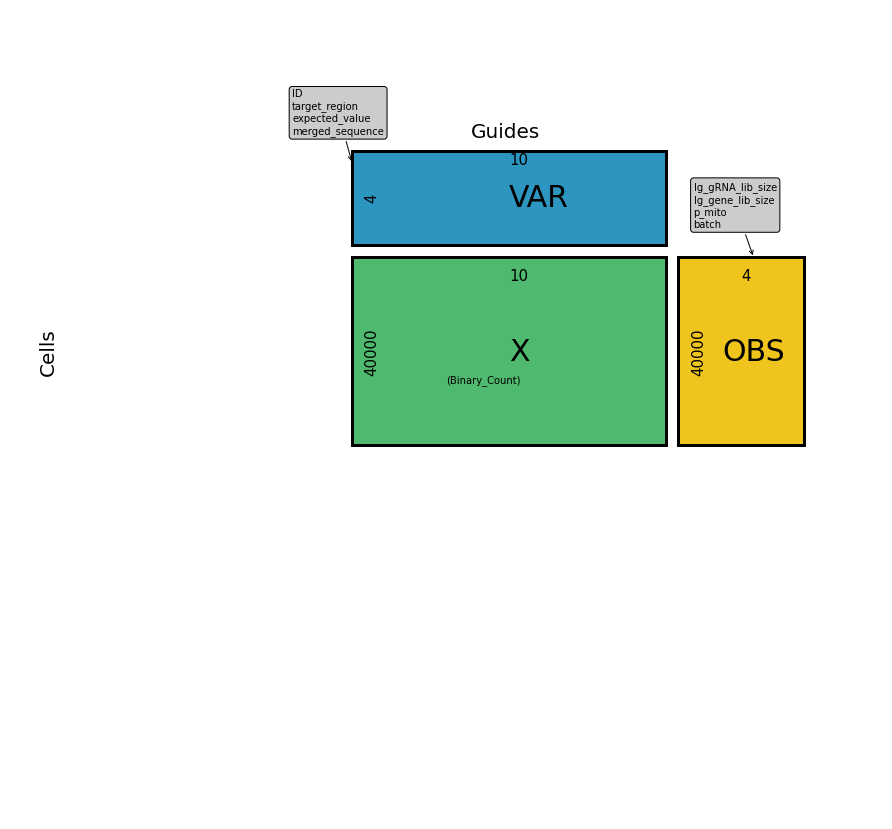

VAR,description
ID,Gene ID
guide_affecting,If some guide was designed to affect this gene in this assay
expected_effect,"The expected expression change direction case a guide is affecting this gene: ex: Downregulation , Upregulation or No_change"


OBS,description
lg_gRNA_lib_size,log normalized total UMI for all guides
lg_gene_lib_size,log normalized total UMI for all transcripts
p_mito,Percentage of mitocondrial reads in this cell
batch,Number of the batch used to generate this cell


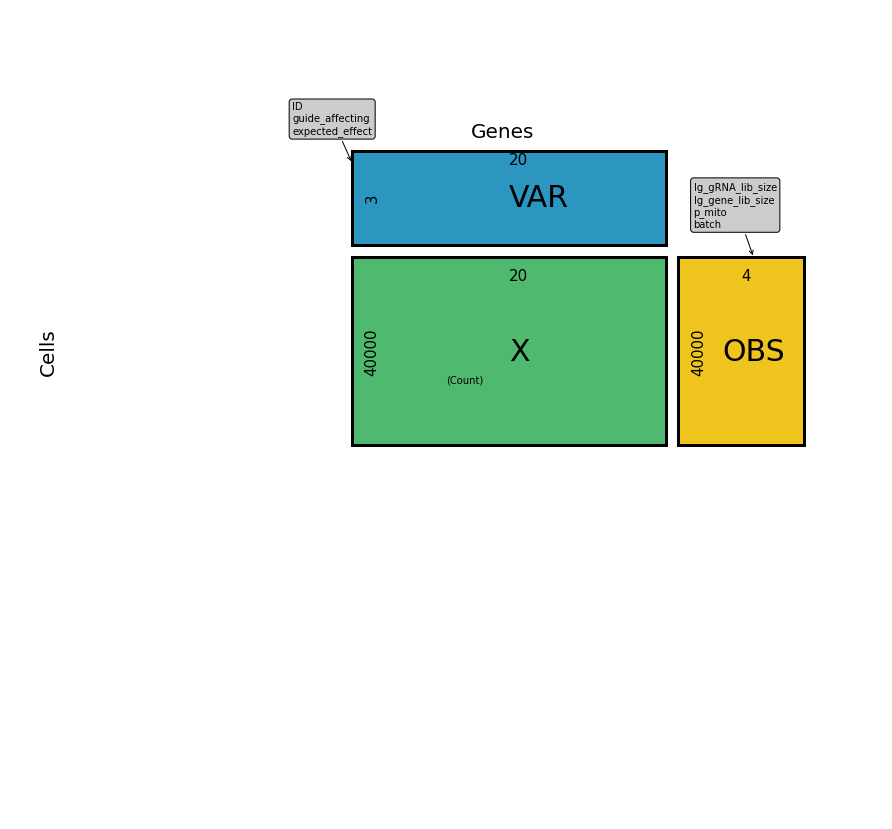

In [ ]:

# This script is used to create a figure with the AnnData object.
# The figure is created by using the matplotlib library and the AnnData object following the AnnData documentation.
# A description of variables should be provided in a dataframe.
# The dataframe should have the fields 'var_category', 'var_name', 'description'

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.core.display import display, HTML
from anndata import AnnData


class VizAnnData():
  '''                         
    Class description:
    This class is used to create a visual representation of the AnnData in the form of a figure.
    The figure is created by using the matplotlib library and the AnnData object.


  ''' 
  def __init__(self, ann_data, x_row_name, y_row_name, x_multi, descriptions_table=None):
    '''
    Initialize the class with the AnnData object and the names of the X  matrix
     horizontal values (x_row_name) and vertival values (y_row_names) that will be used to create the figure.
    Attributes:
        ann_data: AnnData object
        x_row_name: name of the horizontal values of X matrix (e.g. 'Gene')
        y_row_name: name of the vertical values of X matrix (e.g. 'Cell')
        x_multi: list of names of the X matrix that are stacked (e.g. ['Counts', 'Normalized Counts'])
        descriptions_table: default None
            table with the descriptions of the variables.
            This dataframe shoud have the fields 'var_category', 'var_name', 'description'
                Dataframe representation example:  
                var_category | var_name | description
                ----------------|----------|----------------
                OBS            | total_number_of_guides     | Total number of guides in each cell
                OBS            | total_number_of_exp_genes     | Total number of expressed genes in each cell
                OBS            | percentage_mitocondrial_reads     | Percentage of mitocondrial reads in each cell
                VAR            | guide_has_gene_target     | Does the guide have a gene target
    
    The figure is created by using the matplotlib library and the AnnData object following the AnnData documentation.          

  
    returns:        
        None
    Result:
        A figure is created with the AnnData object.
    ex:
        VizAnnData(ann_data, 'Gene', 'Cell', ['Counts', 'Normalized Counts'],descriptions_table)
    
    
    '''
    self.ann_data = ann_data
    self. x_row_name = x_row_name
    self.y_row_name =  y_row_name
    self.x_multi= x_multi
    self.descriptions_table=descriptions_table
    self.current_plot  =  self.initialize_figure()
    self.create_block_X()
    self.create_block_VAR()
    self.create_block_OBS()
    


  def create_block_X(self):
    '''
    This function creates the block of the X matrix. 
    Case x_multi is empty, the block is created with a single (non-stacked) X matrix.
    Case x_multi is not empty, the block is created with multiple (stacked) X matrices (The matrices names should be in the list x_multi).
    Result:
        A block is created with the X matrix.
    '''
    if len(self.x_multi)>1:
      multi_status = True
    else:
      multi_status=False
    self.create_ann_block('X', 25, 40, 50, 30, '#4fba6f', multi_status, self.ann_data .X.shape[0], self.ann_data .X.shape[1], multi_names=self.x_multi) 
    plt.text(-25, 55, self.x_row_name, rotation=90, va='center', fontsize=20)
    plt.text(44, 90, self.y_row_name, va='center', fontsize=20)



  def create_block_VAR(self):
    '''
    This function creates the block of the VAR matrix and generates the description of the variables.
    Result:
        A block is created with the VAR matrix.
    '''
    self.create_ann_block('VAR', 25, 72, 50, 15, '#2c96c0', False, self.ann_data.var.shape[1], self.ann_data .var.shape[0]) 
    self.current_plot.annotate('\n'.join(self.ann_data .var.columns),
      xy=(25, 85), xycoords='data',
      xytext=(-60, 30), textcoords='offset points',
      bbox=dict(boxstyle="round", fc="0.8"),
      arrowprops=dict(arrowstyle="->",
                      connectionstyle="arc,angleA=-90,angleB=0,armB=0,rad=10"))
    
    self.generate_description('VAR', self.ann_data.var.columns, self.descriptions_table, color='#2c96c07a')


  def create_block_OBS(self):
    '''	
    This function creates the block of the OBS matrix and generates the description of the variables.
    Result:
        A block is created with the OBS matrix.
    '''
    self.create_ann_block('OBS', 77, 40, 20, 30, '#efc41c', False, self.ann_data .obs.shape[0], self.ann_data .obs.shape[1], -3) 
    
    self.current_plot.annotate('\n'.join(self.ann_data .obs.columns),
            xy=(89, 70), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=-90,angleB=0,armB=0,rad=10"))

    self.generate_description('OBS', self.ann_data.obs.columns, self.descriptions_table, color='#efc41c')




  def add_element(self, x, y, x_extend, y_extend, color_use):
    '''
    This function adds a rectangle to the current figure using the parameters x, y, x_extend, y_extend and color_use.
    attributes:
        x: x coordinate of the rectangle
        y: y coordinate of the rectangle
        x_extend: x extend of the rectangle
        y_extend: y extend of the rectangle
        color_use: color of the rectangle   
    '''
    self.current_plot .add_patch(
     patches.Rectangle(
        (x,  y),
        x_extend,
        y_extend,
        fill=True , facecolor = color_use ,lw=3, edgecolor = 'black') )
    
  def create_ann_block(self, name, x, y, x_extend, y_extend, color_use, multiple_layers=False, rows=None, cols=None, name_off_set=0, multi_names=False):
    '''
    This function creates the block of the AnnData object
    attributes:
        name: name of the block (e.g. 'X')
        x: type int
             x coordinate of the block
        y: type int
            y coordinate of the block
        x_extend: type int
            x extend of the block
        y_extend: type int
            y extend of the block
        color_use: type string
            color of the block
        multiple_layers: type boolean
            if True, the block is created with multiple layers representation
        rows: type int or None  (default None)
            number of rows of the block
        cols: type int or None  (default None)
            number of columns of the block
        name_off_set: type int (default 0)
            offset of the name of the block
        multi_names:
            if True, the block is created refering to multiple layers names provided in the list multi_names
        
                    


    '''
    
    self.add_element(x, y, x_extend, y_extend, color_use)
    if multiple_layers:
      self.add_element(x+1, y+1, x_extend, y_extend, color_use)
    plt.text(x + (x_extend/2) + name_off_set , y + (y_extend/2), name , va='center', fontsize=30)

    if multi_names:
      plt.text(x + ((x_extend/2)*0.6) + name_off_set , y + ((y_extend/2)* 0.7) , f"({'  ,  '.join(multi_names)})"  , va='center', fontsize=10)

    if rows and cols:
        plt.text(x +2 , y + (y_extend/2), rows , rotation=90, va='center', fontsize=15)
        plt.text(x + (x_extend/2) , y + (y_extend*0.9), cols , va='center', fontsize=15)


    
  def generate_description( self, table_name,var_names, var_descriptions, color='#2c96c07a'):
    ''' Generates a colorfull HTML table for each corresponding to the Ann data and the descriptions of the variables.
        Attributes:
            table_name: str
                name of the table
          var_names: list[str]
                list of the names of the variables         
          var_descriptions: list[str]
            A list contaning the description for each var
          color : str
            hex or color name (default '#2c96c07a')
    '''
    
    header_tr = f'''

      <style>
        table, th, td {{
        border: 1px solid white;
        border-collapse: collapse;
      }}
      </style>
      <table style="background-color:{color};  border: 3px solid white; ">
        <tr>
          <th>{table_name}</th>
          <th>description</th>
        </tr>'''


    df_des_category = var_descriptions.query(f'var_category == "{table_name}"')

    var_descriptions_final = []
    for v_name in var_names:
      
      var_descriptions_final.append(df_des_category.query(f"var_name == '{v_name}' ").iloc[0]['description'])

    table_elements = ''.join([  f'<tr><td>{v_name}</td><td>{d_text}</td></tr>' for v_name, d_text in zip(var_names, var_descriptions_final)]) + '</table>'
    display(HTML(header_tr + table_elements))






  def initialize_figure(self):
    '''
    This function initializes the figure and the current plot.
    returns:
        self.current_plot: type matplotlib.pyplot.figure
 

    '''
    plt.rcParams["figure.figsize"] = (20,15)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, aspect='equal')
    plt.xlim(-30,110)
    plt.ylim(-20,110)
    return ax2
  def show_figure(self):
    '''
    This function shows the figure 
    result:
        the figure is shown 
    '''
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.show()


#VizAnnData(ann_guide, 'Cells', 'Genes' , x_multi=['Count']).show_figure()
#Examples of dataframe used to descrive the variables inside the AnnData object
description_guide_table = pd.DataFrame([['VAR', 'ID', 'Guide ID'],
 ['VAR','target_region','Target region classification: Positive is expect to have a expression change case targeted'],
 ['VAR','expected_value','This is the direction the effect generated in the gene targetd by this guide presence '],
 ['VAR','merged_sequence','Sequence of all guides targeting this region'],
 ['OBS','lg_gRNA_lib_size','log normalized total  UMI for all guides'],
 ['OBS','lg_gene_lib_size','log normalized total  UMI for all transcripts'],
 ['OBS','p_mito','Percentage of mitocondrial reads in this cell'],
 ['OBS','batch','Number of the batch used to generate this cell']
 ], columns=['var_category', 'var_name', 'description'])

VizAnnData(ann_guide, 'Cells', 'Guides' , x_multi=['Binary_Count'], descriptions_table=description_guide_table).show_figure()

#Examples of dataframe used to descrive the variables inside the AnnData object

description_genes_table = pd.DataFrame([['VAR', 'ID', 'Gene ID'],
 ['VAR','guide_affecting','If some guide was designed to affect this gene in this assay'],
 ['VAR','expected_effect','The expected expression change direction case a guide is affecting this gene: ex: Downregulation , Upregulation or No_change'],
 ['OBS','lg_gRNA_lib_size','log normalized total  UMI for all guides'],
 ['OBS','lg_gene_lib_size','log normalized total  UMI for all transcripts'],
 ['OBS','p_mito','Percentage of mitocondrial reads in this cell'],
 ['OBS','batch','Number of the batch used to generate this cell']
 ], columns=['var_category', 'var_name', 'description'])



VizAnnData(ann_exp, 'Cells', 'Genes' , x_multi=['Count'], descriptions_table=description_genes_table).show_figure()


In [ ]:

ann_guide.write('/content/drive/MyDrive/simulation_perturb_tables/anndata_shendure_guides.h5ad')
ann_exp.write('/content/drive/MyDrive/simulation_perturb_tables/anndata_shendure_genes.h5ad')

NameError: ignored

#Loading Ann Data (restart point case simulation)

In [ ]:
#there is a conflict between r2py and sceptre installation. Restart the kernel
#to the original configurations before proceed
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


In [ ]:
!pip  install anndata

  Using cached anndata-0.8.0-py3-none-any.whl (96 kB)
     |████████████████████████████████| 4.1 MB 3.4 MB/s 
     |████████████████████████████████| 15.7 MB 33.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 40 kB 6.9 MB/s 
     |████████████████████████████████| 11.3 MB 50.0 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 503 kB 63.6 MB/s 
     |████████████████████████████████| 247 kB 73.7 MB/s 


In [ ]:
from anndata import AnnData, read_h5ad


In [ ]:
ann_guide = read_h5ad('/content/drive/MyDrive/simulation_perturb_tables/anndata_shendure_guides.h5ad')
ann_exp = read_h5ad('/content/drive/MyDrive/simulation_perturb_tables/anndata_shendure_genes.h5ad')

In [ ]:
!conda install -c conda-forge/label/cf202003 r -y
!Rscript -e 'install.packages("devtools", repos = "http://cran.us.r-project.org")'
!ln /bin/gzip /usr/bin/gzip
!apt install tar
!ln /bin/gzip /usr/bin/gzip   
!ln -s tar /bin/gtar
!Rscript -e 'install.packages("BiocManager", repos = "http://cran.us.r-project.org")'
!Rscript -e 'BiocManager::install("Rhdf5lib")'
!Rscript -e 'BiocManager::install("rhdf5")'
!Rscript -e 'devtools::install_github("katsevich-lab/sceptre")'

In [ ]:
!Rscript -e 'install.packages("doParallel", repos = "http://cran.us.r-project.org")'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘foreach’, ‘iterators’

trying URL 'http://cran.us.r-project.org/src/contrib/foreach_1.5.2.tar.gz'
Content type 'application/x-gzip' length 89758 bytes (87 KB)
downloaded 87 KB

trying URL 'http://cran.us.r-project.org/src/contrib/iterators_1.0.14.tar.gz'
Content type 'application/x-gzip' length 300266 bytes (293 KB)
downloaded 293 KB

trying URL 'http://cran.us.r-project.org/src/contrib/doParallel_1.0.17.tar.gz'
Content type 'application/x-gzip' length 164254 bytes (160 KB)
downloaded 160 KB

* installing *source* package ‘iterators’ ...
** package ‘iterators’ successfully unpacked and MD5 sums checked
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded
* DONE (iterators)
* installing *source* package ‘foreach’ ...
** package 

In [ ]:
!Rscript -e 'library(sceptre)'

#Simulation

In [ ]:
#selecting cells with the interest guide 
interest_guide = 'KRT18_TSS'
GENE = 'ENSG00000111057'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
guide = pd.DataFrame(ann_guide.X, columns=ann_guide.var.index.tolist(), index=ann_guide.obs.index.values)
expression = pd.DataFrame(ann_exp.X, columns=ann_exp.var.index.tolist(), index=ann_exp.obs.index.values)
covariates = ann_guide.obs
covariates.to_csv('covariates.txt', sep='\t')

In [ ]:
ann_exp.var

,ID,guide_affecting,expected_effect
ENSG00000111057,ENSG00000111057,KRT18_TSS,DOWNREGULATION
ENSG00000121211,ENSG00000121211,MND1_TSS,DOWNREGULATION
ENSG00000134809,ENSG00000134809,TIMM10_TSS,DOWNREGULATION
ENSG00000166902,ENSG00000166902,MRPL16_TSS,DOWNREGULATION
ENSG00000172809,ENSG00000172809,RPL38_TSS,DOWNREGULATION
ENSG00000105298,ENSG00000105298,NO_GUIDE_TARGETING,NO_CHANGES
ENSG00000108389,ENSG00000108389,NO_GUIDE_TARGETING,NO_CHANGES
ENSG00000157985,ENSG00000157985,NO_GUIDE_TARGETING,NO_CHANGES
ENSG00000107731,ENSG00000107731,NO_GUIDE_TARGETING,NO_CHANGES
ENSG00000184357,ENSG00000184357,NO_GUIDE_TARGETING,NO_CHANGES


-1.619496246421171
-1.5831707873269565
-1.527867928996232
-1.5180361233495048
-1.5131449399361518
-1.474600029171902
-1.4416948503422908
-1.4232224414221137
-1.3825007254854849
-1.3825007254854849
-1.3472406874072183
-1.3516013933967974
-1.342892795762121
-1.325631044385671
-1.3043391839523544
-1.2221689560790128
-1.2181802505258774
-1.1983998983422774
-1.1983998983422774
-1.1406285266112781
-1.038586721338175
-0.9935459670645895
-0.9799641488896854
-0.969860400594984
-0.9631635196032529
-0.9498619725956077
-0.8978425437628066
-0.8851241265083878
-0.8851241265083878
-0.8914694819309446
-0.8631315131940878
-0.860016825227214
-0.8538072536572525
-0.8445423804163825
-0.8507123288780785
-0.8383987068142748
-0.8261885323204597
-0.8170979332041937
-0.820121747395513
-0.7931310389706986
-0.7754119814419276
-0.7695535267120068
-0.7695535267120068
-0.7579067720984445
-0.7521182387094857
-0.7521182387094857
-0.7291924225160983
-0.7291924225160983
-0.7263518884852784
-0.7094250232382899
-0.703826

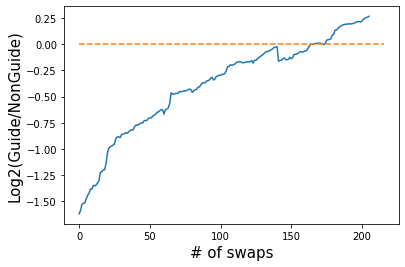

In [ ]:
tested_gene = GENE
#shufle this values to remove some cell bias? 
cells_with_guide_to_sample =    guide[guide[interest_guide] == 1].copy()
cells_without_guide_to_sample = guide[guide[interest_guide] == 0].copy()

cells_with_guide = cells_with_guide_to_sample.sample(cells_with_guide_to_sample.shape[0]).index
cells_without_guide= cells_without_guide_to_sample.sample(cells_without_guide_to_sample.shape[0]).index
guide_copy_to_shuffle = guide.copy()

fold_change_list = []
guide_list_generated = []


for x in range(len(cells_with_guide)):
    guide_copy_to_shuffle.loc[cells_with_guide[x]][interest_guide]    = 0  # swaping
    guide_copy_to_shuffle.loc[cells_without_guide[x]][interest_guide]   = 1  # swaping
    expression_no_guide_gene_x =   expression[tested_gene].loc[guide_copy_to_shuffle[guide_copy_to_shuffle[interest_guide] == 0].copy().index.values]
    expression_with_guide_gene_x = expression[tested_gene].loc[guide_copy_to_shuffle[guide_copy_to_shuffle[interest_guide] == 1].copy().index.values]

    fold_change = np.log2(expression_with_guide_gene_x.mean()/ expression_no_guide_gene_x.mean())
    print (fold_change)
    fold_change_list.append(fold_change)
    guide_list_generated.append(guide_copy_to_shuffle[interest_guide].copy())

no_swap_fc =  fold_change_list[0]
all_swap_fc = fold_change_list[-1]


plt.plot(fold_change_list)
plt.ylabel(r'Log2(Guide/NonGuide)', fontsize=15)
plt.xlabel('# of swaps', fontsize=15)
plt.plot([0,plt.xlim()[1]], [0,0], linestyle='--')

In [ ]:
def create_interval(max_fc, min_fc, steps=10):
  interval_in = (max_fc - min_fc) / steps
  return [min_fc + (interval_in  * x) for x in range(0, steps)]

In [ ]:
out_interval = create_interval(fold_change_list[-1]
                ,fold_change_list[0],
                10)

In [ ]:
def closest_fold_change(fold_change_list, generated_interval):
  return_index_use = []
  for i in generated_interval:
    
    index_closest = np.argmin(np.abs(np.array(fold_change_list) - i))
    final_value = [fold_change_list[index_closest], i , index_closest]
    return_index_use.append(final_value)
  return return_index_use


fold_choices = closest_fold_change(fold_change_list, out_interval)

In [ ]:
fold_choices

[[-1.619496246421171, -1.619496246421171, 0],
 [-1.4232224414221137, -1.4310163086272973, 7],
 [-1.2221689560790128, -1.2425363708334236, 15],
 [-1.038586721338175, -1.0540564330395499, 20],
 [-0.8631315131940878, -0.8655764952456761, 30],
 [-0.6788958009146855, -0.6770965574518024, 53],
 [-0.4766814403670886, -0.4886166196579287, 66],
 [-0.29708197348920085, -0.30013668186405495, 99],
 [-0.10912594863416114, -0.11165674407018122, 129],
 [0.08682842947892239, 0.0768231937236925, 179]]

In [ ]:
#creating pair test file
pd.DataFrame(
    {'gene_id':[GENE],'gRNA_group':[interest_guide], 'pair_type':['add_test_tag_type']}
).to_csv('pairs_test.txt', sep='\t',index=None)



In [ ]:

def run_sceptre(input_guide_list_generated, gene):
  GENE = gene
  tested_gene = GENE
  exp_one_column_file = f'{GENE}__exp_one_gene_guide.txt'
  expression[tested_gene].to_csv(exp_one_column_file)
  input_guide_list_generated.to_csv('guide_use.txt')
 

  r=f'''library(sceptre)
  library(dplyr)
  exp = read.table("{exp_one_column_file}", sep=',' ,header=TRUE, row.names=1)
  
  g_I = read.table("guide_use.txt",   sep=',', header=TRUE, row.names=1)
  
  cov = read.table("covariates.txt", sep='\t', header=TRUE, row.names=1)
  pairs_test = read.table("pairs_test.txt", sep='\t', header=TRUE)
  result <- run_sceptre_high_moi(gene_matrix = t(exp), 
                                        combined_perturbation_matrix = t(g_I), 
                                        covariate_matrix = cov,
                                        gene_gRNA_group_pairs = pairs_test,
                                        B = 500,
                                        side="left",
                                        seed = 1234)

  result$p_value
  result$z_value
  #> Running gRNA precomputation.'''

  file_save = open('r_script.r', 'w')
  file_save.write(r)
  file_save.close()


  r_out = !Rscript r_script.r
  p_value = float(r_out[-3].split(' ')[-1])

  return p_value


In [ ]:
plot_pvalues = [ [run_sceptre(guide_list_generated[index_fc], GENE), fold_final]  for fold_final,target_fc,index_fc in fold_choices ]

In [ ]:
plot_info = [ [index_fc,fold_final]  for fold_final,target_fc,index_fc in fold_choices ]

Text(0.5, 1.0, 'ENSG00000111057')

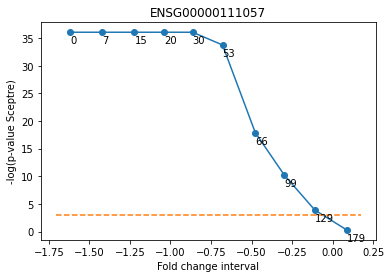

In [ ]:
plt.plot([x[1] for x in plot_pvalues],[ -np.log(x[0]) for x in plot_pvalues] )

plt.scatter([x[1] for x in plot_pvalues],[ -np.log(x[0]) for x in plot_pvalues] )

plt.plot([plt.xlim()[0], plt.xlim()[1]], [-np.log(0.05), -np.log(0.05)] , linestyle='--')

for x_t,y_t,n_t in  zip([x[1] for x in plot_pvalues],
                        [ -np.log(x[0]) for x in plot_pvalues],
                        [ x[0] for x in plot_info] ):
    plt.text(x_t,y_t-2,n_t)


plot_info

plt.ylabel('-log(p-value Sceptre)')
plt.xlabel('Fold change interval')
plt.title(GENE)